In [1265]:
import numpy as np
from scipy.special import expi
import matplotlib.pyplot as plt

In [1419]:
sigma = 1
alpha_omega = 0.1
f_omega = 1.3
N_omega = 137

x = np.linspace(-1.01, 1, 201)+1e-8
z = np.linspace(0, 2, 401)
X, Z = np.meshgrid(x, z)

B = (-((1j * sigma + alpha_omega) ** 2) - f_omega**2) ** (1 / 2)
C = (1 / (N_omega**2) * (1j * sigma + alpha_omega) ** 2 + 1) ** (1 / 2)
B, C = np.complex128(B), np.complex128(C)
A = B / C
chi = np.sign(np.imag(1 / A))

L_1 = chi * (1 / A) * Z + X
L_2 = -chi * (1 / A) * Z + X

mu_1 = np.sign(np.real(L_1))
mu_2 = np.sign(np.real(L_2))

psi_1 = np.zeros_like(Z, dtype=complex)
psi_2 = np.zeros_like(Z, dtype=complex)
psi_3 = np.zeros_like(Z, dtype=complex)
psi_4 = np.zeros_like(Z, dtype=complex)

D = -2 * np.pi / (B**2 * 2 * 1j)

# psi_1 = -D * A * 2 * 1j * np.pi * (np.sign(X) * np.sinh(A * L_1) + np.sign(X) * np.sinh(A * L_2))
# psi_2 = D * A * (np.exp(A * L_1) * expi(-A * L_1) - np.exp(-A * L_1) * expi(A * L_1))
# psi_3 = D * A * (np.exp(-A * L_2) * expi(A * L_2) - np.exp(A * L_2) * expi(-A * L_2))
# psi_4 = D * np.exp(-Z) * 2 * A * np.sign(X) * 1j * np.pi * 2 * np.sinh(A * X)

theta_b = np.atan2(-np.real(1/A), np.imag(1/A))
theta_b

theta_b = np.pi/2

psi_1 += -np.exp(A*L_1)*(-1j*np.pi-expi(-A*L_1))
psi_1 += np.exp(A*X)*(-1j*np.pi - expi(-A*X))*np.exp(-Z)

psi_1 += np.exp(-A*L_1)*(1j*np.pi - expi(A*L_1, theta_b=np.pi))
psi_1 += -np.exp(-A*X)*(1j*np.pi - expi(A*X, theta_b=np.pi))*np.exp(-Z)

psi_1 += -np.exp(A*L_2)*(expi(-A*L_2, theta_b=np.pi)+1j*np.pi)
psi_1 += np.exp(A*X)*(expi(-A*X, theta_b=np.pi)+1j*np.pi)*np.exp(-Z)

psi_1 += np.exp(-A*L_2)*(expi(A*L_2)+1j*np.pi)
psi_1 += -np.exp(-A*X)*(expi(A*X)+1j*np.pi)*np.exp(-Z)

psi_1 = psi_1 * D * A

# psi = psi_1 + psi_2 + psi_3 + psi_4

# k = 12
# psi_1 = k/(k**2+1)*(np.exp(chi*k/A*1j*Z)-np.exp(-Z))*np.exp(1j*k*X)

# psi_1 = -A * np.exp(A * L_1) * mu_1 * 1j * np.pi
# psi_1 += A * np.exp(A * L_1) * expi(-A * L_1)
# psi_1 += A * np.exp(-A * L_1) * mu_1 * 1j * np.pi
# psi_1 += -A * np.exp(-A * L_1) * expi(A * L_1)

# psi_1 += A * np.exp(A * X) * (np.sign(X) * 1j * np.pi) * np.exp(-Z)
# psi_1 += A * np.exp(A * X) * (-expi(-A * X)) * np.exp(-Z)
# psi_1 += -A * np.exp(-A * X) * (np.sign(X) * 1j * np.pi) * np.exp(-Z)
# psi_1 += -A * np.exp(-A * X) * (-expi(A * X)) * np.exp(-Z)

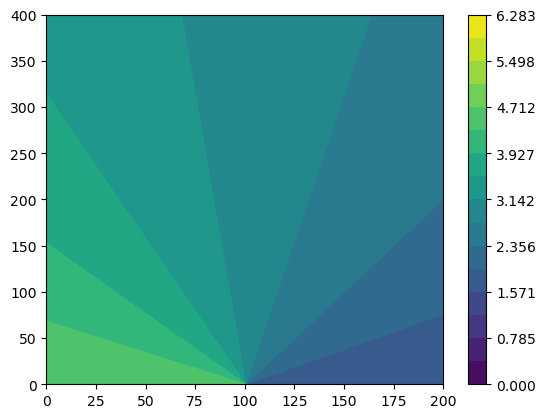

In [1424]:
angles = np.atan2(np.imag(1j*L_1), np.real(1j*L_1))
angles[angles < 0] += 2*np.pi
levels = np.linspace(0, 2*np.pi, 17)
con = plt.contourf(angles, levels=levels)
plt.colorbar(con)

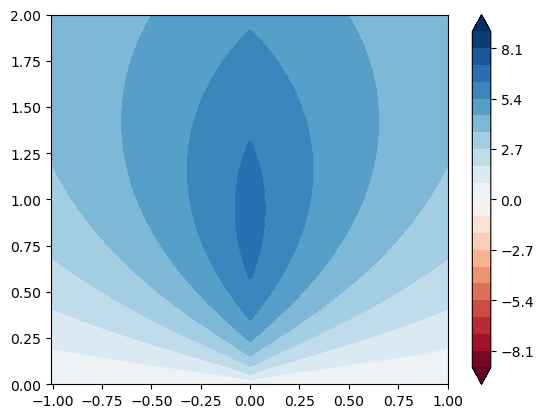

In [1420]:
t = np.pi/10 * 3
levels = np.linspace(-9, 9, 21)
con = plt.contourf(X, Z, np.real((psi_1)*np.exp(1j*t)), levels=levels, extend='both', cmap="RdBu")
plt.colorbar(con, extend='both')

Text(0.5, 1.0, 'Imaginary Part')

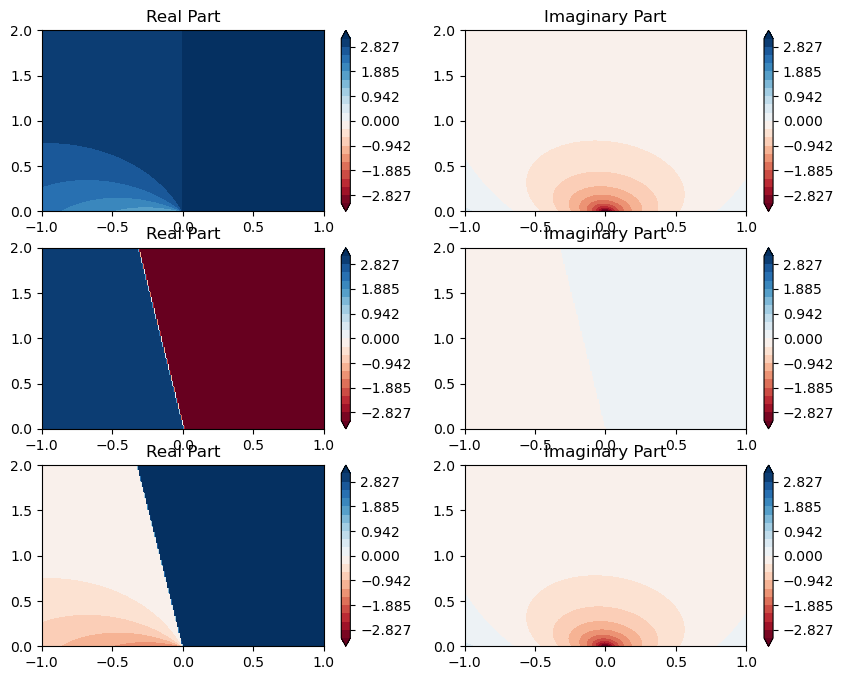

In [1392]:
# z = np.arange(0, 10, .01)
k = np.arange(0, 5, .001)
x = np.linspace(-1, 1, 201)
z = np.linspace(0, 2, 401)
X, Z = np.meshgrid(x, z)
L_1 = chi * (1 / A) * Z + X

k = k[10]
arg = 1j * L_1 * (1j * A + k)
test = expi(arg) 

cond_1 = (angle<0) & (angle>-np.pi/2)
test[cond_1] += 2 * 1j * np.pi

limit = np.ones_like(test) * 1j * np.pi * mu_1

t = np.pi * 1 / 2

mu_1 = np.sign(np.real(L_1))
mu_2 = np.sign(np.real(L_2))

levels = np.linspace(-np.pi, np.pi, 21)

kwargs = {"levels": levels, "extend": "both", "cmap": "RdBu"}

fig, ax = plt.subplots(3, 2, figsize=(10, 8))

con = ax[0, 0].contourf(X, Z, np.real(test * np.exp(1j * t)), **kwargs)
cbar = fig.colorbar(con, ax=ax[0, 0], extend="both")
ax[0, 0].set_title("Real Part")
con = ax[0, 1].contourf(X, Z, np.imag(test * np.exp(1j * t)), **kwargs)
cbar = fig.colorbar(con, ax=ax[0, 1], extend="both")
ax[0, 1].set_title("Imaginary Part")

con = ax[1, 0].contourf(X, Z, np.real(limit * np.exp(1j * t)), **kwargs)
cbar = fig.colorbar(con, ax=ax[1, 0], extend="both")

ax[1, 0].set_title("Real Part")
con = ax[1, 1].contourf(X, Z, np.imag(limit * np.exp(1j * t)), **kwargs)
cbar = fig.colorbar(con, ax=ax[1, 1], extend="both")
ax[1, 1].set_title("Imaginary Part")

con = ax[2, 0].contourf(X, Z, np.real((test - limit) * np.exp(1j * t)), **kwargs)
cbar = fig.colorbar(con, ax=ax[2, 0], extend="both")
ax[2, 0].set_title("Real Part")
con = ax[2, 1].contourf(X, Z, np.imag((test - limit) * np.exp(1j * t)), **kwargs)
cbar = fig.colorbar(con, ax=ax[2, 1], extend="both")
ax[2, 1].set_title("Imaginary Part")

In [1393]:
import numpy as np
from scipy.special import expi as sp_expi
import matplotlib.pyplot as plt

def expi(z, theta_b=np.pi/2):
    """
    Calculates the exponential integral Ei(z) with a user-defined branch cut.
    This version is optimized for NumPy arrays using boolean masking.

    Args:
        z (np.ndarray): The complex numbers at which to evaluate Ei.
        theta_b (float, optional): The angle in radians where the new
            branch cut should be placed. Defaults to np.pi (the standard cut).
            Must be in the interval (-pi, pi].

    Returns:
        np.ndarray: The value of Ei(z) on the specified branch.
    """
    if not (-np.pi < theta_b <= np.pi):
        raise ValueError("theta_b must be in the interval (-pi, pi].")

    # Ensure input is a numpy array for vectorized operations
    z = np.asarray(z, dtype=np.complex128)

    # 1. Calculate the principal value for all elements
    principal_value = sp_expi(z)

    # 2. Calculate the angle for all elements
    z_angle = np.angle(z)

    # 3. Initialize the correction array to all zeros
    correction = np.zeros_like(principal_value, dtype=np.complex128)
    
    # 4. Use boolean masking to find elements that need correction
    
    # Case 1: New cut is in the upper-half plane (moved clockwise from pi)
    # The affected region is the sector between the new cut and the standard cut at pi.
    if 0 <= theta_b < np.pi:
        mask = (z_angle > theta_b) & (z_angle <= np.pi)
        correction[mask] = -2j * np.pi

    # Case 2: New cut is in the lower-half plane (moved counter-clockwise from -pi)
    # The affected region is the sector between -pi and the new cut.
    elif -np.pi < theta_b < 0:
        mask = (z_angle > -np.pi) & (z_angle < theta_b)
        correction[mask] = 2j * np.pi

    # 5. Add the correction to the principal value
    return principal_value + correction

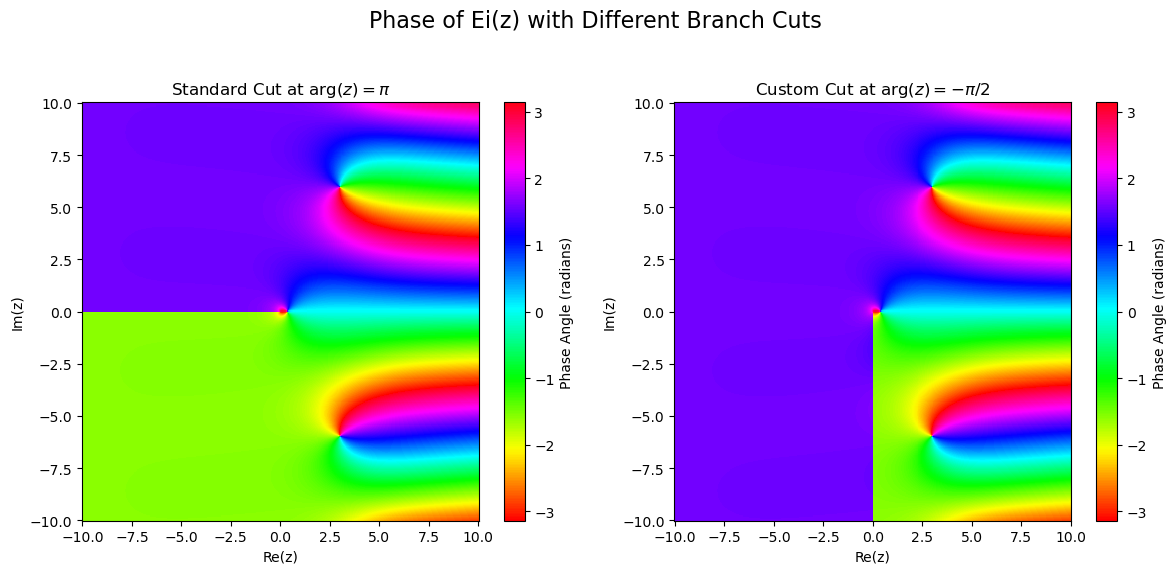

In [1394]:
# --- Visualization Example ---

# Create a grid of points in the complex plane
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

xx, yy = np.meshgrid(x, y)
z_grid = xx + 1j * yy

# --- Calculate Ei for different branch cuts ---
# 1. Standard branch cut along the negative real axis (pi)
ei_standard = expi(z_grid, theta_b=np.pi)

# 2. Custom branch cut along the negative imaginary axis (-pi/2)
ei_custom = expi(z_grid, theta_b=-np.pi / 2)

# --- Plot the phase of the results ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Phase of Ei(z) with Different Branch Cuts', fontsize=16)

# Plot 1: Standard Cut
im1 = ax1.pcolormesh(xx, yy, np.angle(ei_standard), cmap='hsv')
ax1.set_title(r'Standard Cut at $\arg(z) = \pi$')
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
fig.colorbar(im1, ax=ax1, label='Phase Angle (radians)')

# Plot 2: Custom Cut
im2 = ax2.pcolormesh(xx, yy, np.angle(ei_custom), cmap='hsv')
ax2.set_title(r'Custom Cut at $\arg(z) = -\pi/2$')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
fig.colorbar(im2, ax=ax2, label='Phase Angle (radians)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()